In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import string
import scipy

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

border_width = 0.5
linewidth = 6.202
grey = "#BDBDBD"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 8,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width})

ts_green = "#3D8F24"
ts_purple = "#6E38CC"

def circled(x):
    return chr(0x245F+x)

fpath= "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
prop = matplotlib.font_manager.FontProperties(fname=fpath, size=8)

In [2]:
random_nucleo_df = pd.read_csv("random_nucleosome_range_signal_trim.bed", sep="\t", header=None,
                       names=["chrom", "start", "event_no", "coord", "signal"])
random_nucleo_df["event_no"] = pd.to_numeric(pd.factorize(random_nucleo_df["event_no"])[0])
random_ids = random_nucleo_df["event_no"].unique()

random_list_of_nucleo_signals = []
random_signal_mean = np.mean(random_nucleo_df["signal"])

for i in random_ids:
    tmp_list = [np.NaN] * 1001
    sub_df = random_nucleo_df[random_nucleo_df["event_no"] == i]
    sub_df = sub_df.drop_duplicates(subset='start', keep="first")
    val_list = list(sub_df["signal"])
    for sub_i,sub_j in enumerate(list(sub_df["coord"])):
        if val_list[sub_i] > 1000:
            val_list[sub_i] = random_signal_mean
        tmp_list[sub_i] = val_list[sub_i]
    random_list_of_nucleo_signals.append(tmp_list)

random_nucleo_means = list(pd.DataFrame(random_list_of_nucleo_signals).mean())

In [23]:
onek_nucleo_df = pd.read_csv("cancer_nucleosome_occupancy_trim.bed", sep="\t", header=None,
                       names=["chrom", "start", "sample", "coord", "signal"])
onek_nucleo_df["coord"] = onek_nucleo_df["coord"] + 500
onek_nucleo_df["sample"] = pd.to_numeric(pd.factorize(onek_nucleo_df["sample"])[0])
onek_nucleo_ids = onek_nucleo_df["sample"].unique()

onek_nucleo_df_list_of_nucleo_signals = []
desc_signal_mean = np.mean(onek_nucleo_df["signal"])

for i in onek_nucleo_ids:
    tmp_list = [np.NaN] * 4001
    sub_df = onek_nucleo_df[onek_nucleo_df["sample"] == i]
    sub_df = sub_df.drop_duplicates(subset='start', keep="first")
    val_list = list(sub_df["signal"])
    for sub_i,sub_j in enumerate(list(sub_df["coord"])):
        try:
            tmp_list[sub_i] = val_list[sub_i]
        except:
            print(sub_i,sub_j)
            break
    onek_nucleo_df_list_of_nucleo_signals.append(tmp_list)

onek_nucleo_means = list(pd.DataFrame(onek_nucleo_df_list_of_nucleo_signals).mean())

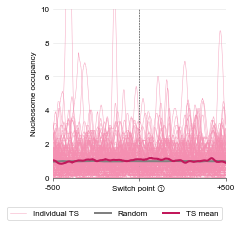

In [77]:
fig,ax = plt.subplots(figsize=(linewidth/2,linewidth/2))

ax.axvline(500, ls="--", lw=border_width, c="black", alpha=1)


for arr_i, arr in enumerate(onek_nucleo_df_list_of_nucleo_signals):
    if arr_i == len(onek_nucleo_df_list_of_nucleo_signals)-1:
        sns.lineplot(x=np.arange(0,len(arr)), y=arr, linewidth=.5, color="#F48FB1", alpha=.8, label="Individual TS")
    else:
        sns.lineplot(x=np.arange(0,len(arr)), y=arr, linewidth=.5, color="#F48FB1", alpha=.8)

rand_plot_nuc = [0]*1500 + random_nucleo_means + [0]*1500

plt_onek_nucleo_means = onek_nucleo_means[1500:2501]

onek_nucleo_means[0] = onek_nucleo_means[1]

sns.lineplot(x=np.arange(0,len(random_nucleo_means)), y=random_nucleo_means,
             linewidth=2, color="grey",
             label="Random")
sns.lineplot(x=np.arange(0,len(plt_onek_nucleo_means)), y=plt_onek_nucleo_means, linewidth=2,
              color="#C2185B",
             label="TS mean")

plt.xlim(0,1000)
plt.ylabel("Nucleosome occupancy")
plt.xticks(np.arange(0,1001,500))
ax.set_xticklabels([-500,"Switch point {}".format(circled(1)),"+500"], font=prop)
# plt.axvline(500, color="black", linestyle="--", linewidth=1)
plt.legend()

#nucleo_means
#plt.axvline(523)
plt.legend()
sns.despine(left=True)

ax.tick_params(axis='y',
               which='both',
               length=0,
               width=border_width,
               pad=3)
ax.tick_params(axis='x',
               bottom=True,
               which='both',
               length=3,
               width=border_width)

ax.yaxis.grid(color="#e0e0e0",
                linewidth=border_width)

# plt.xlim(1000,3001)
plt.ylim(0,10)

#plt.ylim(top=7.5)

ax.legend(ncol=3, bbox_to_anchor=(1,-.15))

# plt.axvline(560)
# plt.savefig("cancer_nucleosome_occupancy_vs_random.pdf", format="pdf",
#             facecolor="white", bbox_inches="tight")